In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Import clean data
gr_data = pd.read_csv('gr_data_CLEAN.csv')
gr_data = gr_data.drop(['Unnamed: 0'],axis=1)

In [3]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

display(gr_data.head(), gr_data.shape)

,title,series,author,description,language,pages,isbn,book_format,publish_year,first_publish_year,publisher,liked_perc,bbe_score,bbe_votes,log_num_ratings,5_stars_num_ratings,4_stars_num_ratings,3_stars_num_ratings,2_stars_num_ratings,1_star_num_ratings,rating,fantasy,science fiction,dystopia,young adult,fiction,action,adventure,romance,magic,children,audiobook,school,classics,historical fiction,novels,literature,historical,historical romance,adult,urban fantasy,paranormal,paranormal romance,vampires,holocaust,war,politics,christian fiction,christianity,epic fantasy,civil war,love,drama,coming of age,contemporary,comedy,humor,poetry,picture books,short stories,gothic,mystery,thriller,suspense,crime,mystery thriller,asian countries,asia,horror,european literature,european countries,plays,esoterica,philosophy,self help,inspirational,mental health,north american countries,angels,chick lit,animals,chapter books,magical realism,time travel,iberoamerican literature,fairy tales,greek mythology,mythology,dragons,epic,monsters,gastronomy,food and nutrition,feminism,unfinished,music and musicians,medieval,apocalyptic,detective,victorian,mental illness,psychology,family,african american literature,new york,religion,ireland,nonfiction,history,memoires and biographies,eastern religions and faith,africa,steampunk,economics,contemporary romance,womens,lgtbi and queer,young adult fantasy,travel,young adult contemporary,storytime,mathematics,counting,true crime,cats,westerns,superheroes,graphic novel and comics,world war i,australia,christmas,science,arthurian,banned books,pirates,erotica,prehistoric,witches,retellings,asian literature,tudor period,media tie in,dinosaurs,religion studies,werewolves,portugal,southern,southern gothic,journalism,race,speculative fiction,survival,college,tragedy,african countries,ancient history,abuse,guides and travel,the united states of america,reference,space,military fiction,anthologies,childrens classics,essays,cyberpunk,fae,african literature,legal thriller,physics,death,music,islam,ghosts,regency,germany,collections,judaism,true story,aliens,law,biology,evolution,anthropology,political science,futuristic,french revolution,alternate history,american history,christian romance,robots,ancient,dark,fairies,folklore,zombies,education,demons,mountaineering,sports,medical,medicine,theory,academic,unicorns,business,leadership,new age,personal development,horse racing,american civil war,espionage,social justice and activism,astronomy,american revolution,presidents,gender,greece,nobel prize,noir,native americans,writing,love story,sociology,business and finance,social science,health,disability,halloween,communication,relationships,aviation,romanticism,israel,european history,productivity,management,fighters,psychological thriller,mythology and fairy tales,outdoors,murder mystery,shapeshifters,marriage,architecture,animal fiction,m m romance,south american countries,fashion,programming and computer science,cults,weird fiction,lovecraftian,cultural,dark fantasy,north american literature,historical mystery,batman,americana,genetics,romantic suspense,emotion,womens fiction,new weird,hugo awards,diary and journal,buisness,sports romance,polygamy,entrepreneurship,money,personal finance,baseball,young adult paranormal,crafts,spy thriller,elves,plants,police,archaeology,gardening,historical fantasy,conspiracy theories,world history,medieval history,military history,ecology,sustainability,technology,gaming,utopia,linguistics,rabbits,manga,comic fantasy,ghost stories,amazon,poverty,parenting,hard boiled,aspergers,social,nordic noir,gender studies,wildlife,anime,shojo,counter culture,illness,time travel romance,young adult historical fiction,cartoon,artificial intelligence,heroic fantasy,forgotten realms,dragonlance,amish,modern,geography,doctors,chess,martial arts,engineering,pop culture,pulp,wizards,adoption,hockey,teaching,boarding school,star wars,fitness,fantasy romance,natural history,fan fiction,mermaids,society,mormonism

(52478, 863)

## Exploratory Data Analysis

#### Target to predict: rating

In [4]:
gr_data.rating

0        4.33
1        4.50
2        4.28
3        4.26
4        3.60
         ... 
52473    4.00
52474    4.19
52475    3.70
52476    3.85
52477    4.02
Name: rating, Length: 52478, dtype: float64

In [5]:
gr_data.rating.describe()

count    52478.000000
mean         4.021878
std          0.367146
min          0.000000
25%          3.820000
50%          4.030000
75%          4.230000
max          5.000000
Name: rating, dtype: float64

#### Title

In [6]:
# Top 20 rated books
top_20 = gr_data.nlargest(20, 'rating')
top_20[['title', 'rating']]

,title,rating
3989,Gris Ange 2014,5.0
4009,Das geheimnis der blumen (DEU),5.0
4405,Obscured Darkness (Family Secrets #2),5.0
5118,Rosto Inacabado (Pequenos segredos alquímicos)...,5.0
5162,Elliptical door (A multifaceted overview) (US)...,5.0
5716,Females of Valor,5.0
5740,The Daughter Of Kurdland: A Life Dedicated to ...,5.0
6829,Patience's Love,5.0
8659,Abstraction In Theory - Laws Of Physical Trans...,5.0
9002,Le Poinçon « Pilot Edition »,5.0


In [7]:
# Count number of books with rating 4.5 or more
num_top_rated_books = (gr_data['rating'] >= 5).sum()

print(f"Number of books with a rating of 5: {num_top_rated_books}")

Number of books with a rating of 5: 853


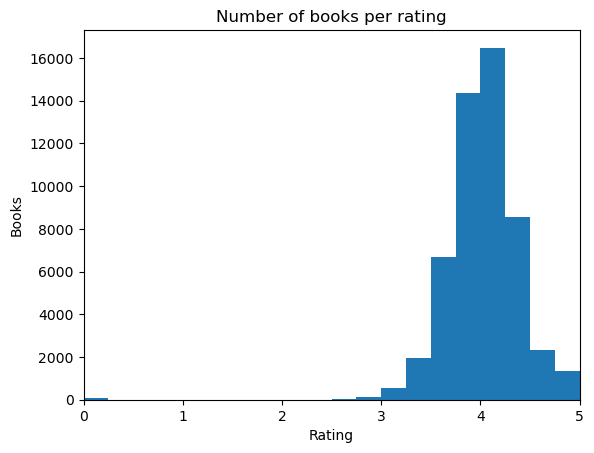

In [8]:
# Plot histogram number of books/Rating
plt.hist(gr_data['rating'], bins=20)
plt.xlim(0, 5)
plt.xlabel('Rating')
plt.ylabel('Books')
plt.title('Number of books per rating')
plt.show()

#### Series

In [9]:
# Book included in some series or not

# Group by 'series'
series_group = gr_data.groupby('series')

# Average rating for titles with a series value other than 'Single Book'
avg_rating_series = round(gr_data[gr_data['series'] != 'Single Book']['rating'].mean(), 2)

# Average rating for titles with a series value of 'Single Book'
avg_rating_single = round(gr_data[gr_data['series'] == 'Single Book']['rating'].mean(), 2)

print("Average rating for titles included in a series:", avg_rating_series)
print("Average rating for titles not included in any series:", avg_rating_single)

Average rating for titles included in a series: 4.08
Average rating for titles not included in any series: 4.0


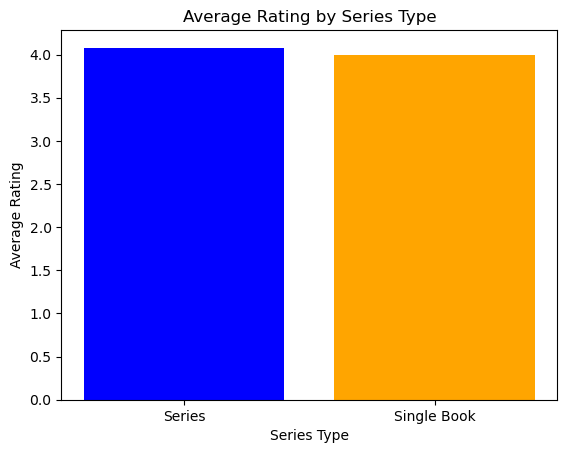

In [10]:
# Plot bar chart
plt.bar(['Series', 'Single Book'], [avg_rating_series, avg_rating_single], color=['blue', 'orange'])

# Title and axis labels
plt.title('Average Rating by Series Type')
plt.xlabel('Series Type')
plt.ylabel('Average Rating')
plt.show()

Being part of a literary series or saga seems not to affect in a significant way average rating (+ 0,8).

In [11]:
# Calculate the average rating per series
series_avg_rating = gr_data.groupby('series')['rating'].mean()

# Count the number of titles per series
series_title_counts = gr_data.groupby('series').size()

# Create a DataFrame from the series_avg_rating and series_title_counts
df_avg_rating = pd.DataFrame({
    'series': series_avg_rating.index,
    'avg_rating': series_avg_rating.values,
    'title_count': series_title_counts.values
})

# Displaying top 20 rated literary series
top_20 = df_avg_rating.nlargest(20, 'avg_rating')
top_20

,series,avg_rating,title_count
1085,Essie Brown,5.000000,2
4387,Zoe The Earless Kitten,5.000000,2
2206,Montgomery Lake High,4.946000,5
3148,The Adventures of Princess Lizzie,4.933333,3
3530,The L & L Mysteries,4.933333,3
1911,Less Than Three,4.910000,4
1579,Imagination,4.900000,2
4005,Time Will Reveal,4.896667,3
4420,Сливенската трилогия,4.873333,3
1005,Duke & Michel,4.835000,2


#### Book Format

In [12]:
# Book format and rating

# Average rating for unique book_format
avg_rating_format = gr_data.groupby('book_format')['rating'].mean().round(2)

# Dataframe
df_avg_rating_format = pd.DataFrame({'book_format': avg_rating_format.index, 'avg_rating': avg_rating_format.values})

# New column to hold the count of books per format
df_avg_rating_format['title'] = gr_data.groupby('book_format').size().values


df_avg_rating_format

,book_format,avg_rating,title
0,Audio,4.08,348
1,Boardbook,4.11,38
2,Boxset,4.38,16
3,Ebook,4.11,8682
4,Graphic Novel and Comic,4.34,29
5,Hardcover,4.00,12391
6,Other formats,4.11,37
7,Paperback,4.01,30775
8,Special Edition,4.27,32
9,Unknown,3.99,130


In [13]:
# Mean of the 'avg_rating' column
avg_rating_mean = df_avg_rating_format['avg_rating'].mean()
print(f"Mean of 'avg_rating' column: {avg_rating_mean}")

Mean of 'avg_rating' column: 4.14


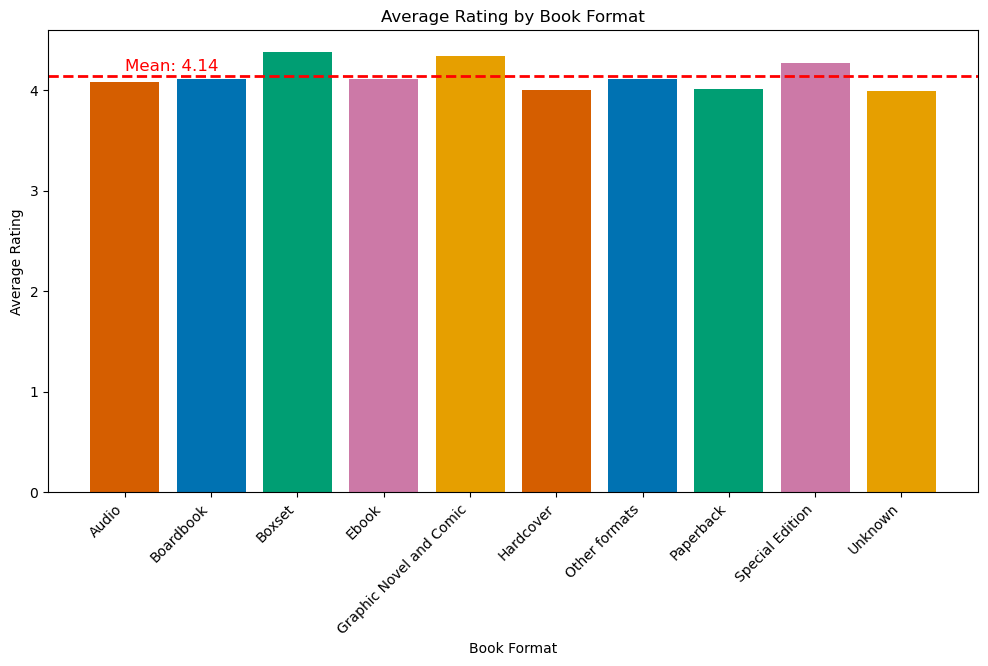

In [14]:
# Bar chart

# Set figsize to (width, height) and colors
fig, ax = plt.subplots(figsize=(12, 6))  
ax.bar(df_avg_rating_format['book_format'], df_avg_rating_format['avg_rating'], color=['#D55E00', '#0072B2', '#009E73', '#CC79A7', '#E69F00'])

# Add a horizontal line for the mean of the 'avg_rating' column
ax.axhline(avg_rating_mean, color='red', linestyle='--', linewidth=2)

# Add a label for the mean value
ax.text(0, avg_rating_mean + 0.05, f'Mean: {avg_rating_mean:.2f}', color='red', fontsize=12)

# Set chart title and axis labels
ax.set_title('Average Rating by Book Format')
ax.set_xlabel('Book Format')
ax.set_ylabel('Average Rating')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()


More elaborated book formats, such as 'Boxset', 'Graphic Novel and Comic', or 'Special Edition', have slightly above-average ratings compared to all book formats.

#### Language

In [15]:
gr_data['language'].nunique()

95

In [16]:
# Group by unique language and get count of titles and average rating
gr_language = gr_data.groupby('language').agg({'title': 'count', 'rating': 'mean'})

# Dataframe
df_language = pd.DataFrame({'language': gr_language.index, 'count': gr_language['title'], 'avg_rating': gr_language['rating']})

# Calculate percentage over total title count
df_language['percentage'] = round((df_language['count'] / df_language['count'].sum()) * 100, 2)

# Sort by count in descending order
df_language = df_language.sort_values('count', ascending=False)

df_language = df_language[['language','count','percentage','avg_rating']]

# Reset index and rename language column
df_language = df_language.reset_index(drop=True).rename(columns={'language': 'Language'})

df_language.head(20)


,Language,count,percentage,avg_rating
0,English,46224,88.08,4.028112
1,Arabic,1080,2.06,3.858852
2,Spanish,723,1.38,3.989474
3,French,607,1.16,3.944333
4,German,553,1.05,3.970705
5,Portuguese,384,0.73,4.032578
6,Indonesian,371,0.71,3.933558
7,Italian,262,0.50,3.862061
8,Dutch,227,0.43,3.805330
9,Turkish,211,0.40,4.085261


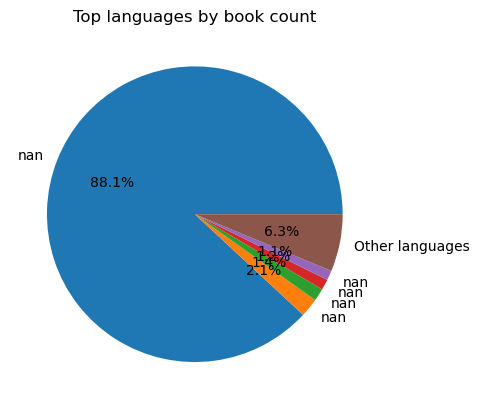

In [20]:
# Top 5 languages
df_language_count_top5 = df_language.head(5)

# New row for other languages
other_count = df_language['count'].sum() - df_language_count_top5['count'].sum()
df_other = pd.DataFrame({'language': ['Other languages'], 'count': [other_count]})

# Concatenate the top 5 languages and the other languages into a single dataframe
df_languages = pd.concat([df_language_count_top5, df_other])

# Plot pie
plt.pie(df_languages['count'], labels=df_languages['language'], autopct='%1.1f%%')

# Set title
plt.title('Top languages by book count')

# Show plot
plt.show()

 'English' language dominates overwhelmingly with 88% of the catalog of books published on GoodReads.

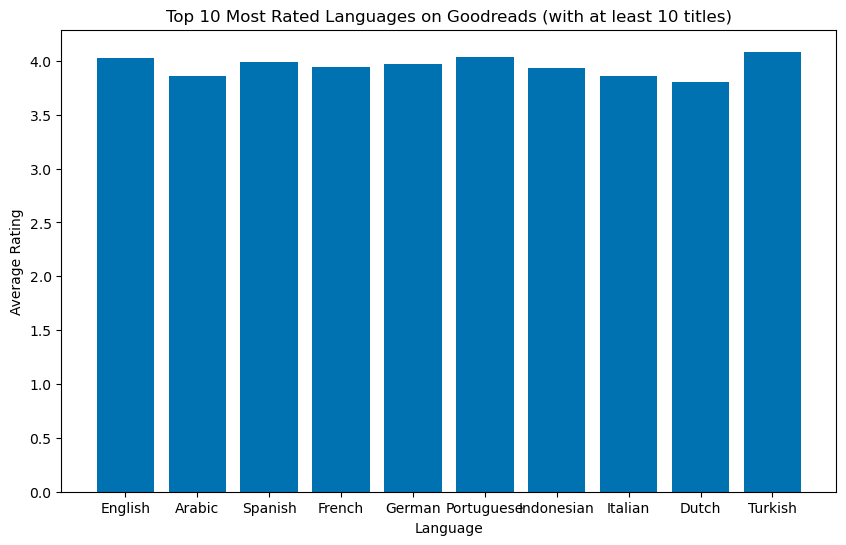

In [21]:
# Top 10 most rated languages with at least 10 titles
top_10_languages = df_language[df_language['count'] > 10].head(10)

# Bar plot
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(top_10_languages['Language'], top_10_languages['avg_rating'], color='#0072B2')

# Labels and title
ax.set_xlabel('Language')
ax.set_ylabel('Average Rating')
ax.set_title('Top 10 Most Rated Languages on Goodreads (with at least 10 titles)')

plt.show()


#### Pages

In [22]:
# Group by 'pages' and calculate count and average rating
grouped_data = gr_data.groupby('pages').agg({'title': 'count', 'rating': 'mean'})
grouped_data = grouped_data.rename(columns={'title': 'count', 'rating': 'avg_rating'})

# Calculate percentage of books in each group
total_books = gr_data['title'].count()
grouped_data['percentage'] = grouped_data['count'].apply(lambda x: (x / total_books) * 100).round(2)

grouped_data = grouped_data.sort_values(by='avg_rating', ascending=False)

grouped_data = grouped_data[['count','percentage','avg_rating']]

grouped_data


,count,percentage,avg_rating
pages,,,
>1000,118,0.22,4.471695
900-1000,533,1.02,4.318030
800-900,217,0.41,4.247419
700-800,353,0.67,4.202918
600-700,659,1.26,4.154325
500-600,1151,2.19,4.129062
Unknown,3630,6.92,4.100014
400-500,2457,4.68,4.084111
300-400,5988,11.41,4.028340


In [23]:
gr_data['pages'].unique()

array(['200-300', '700-800', '100-200', '400-500', '<100', '600-700',
       '900-1000', 'Unknown', '300-400', '500-600', '800-900', '>1000',
       nan], dtype=object)

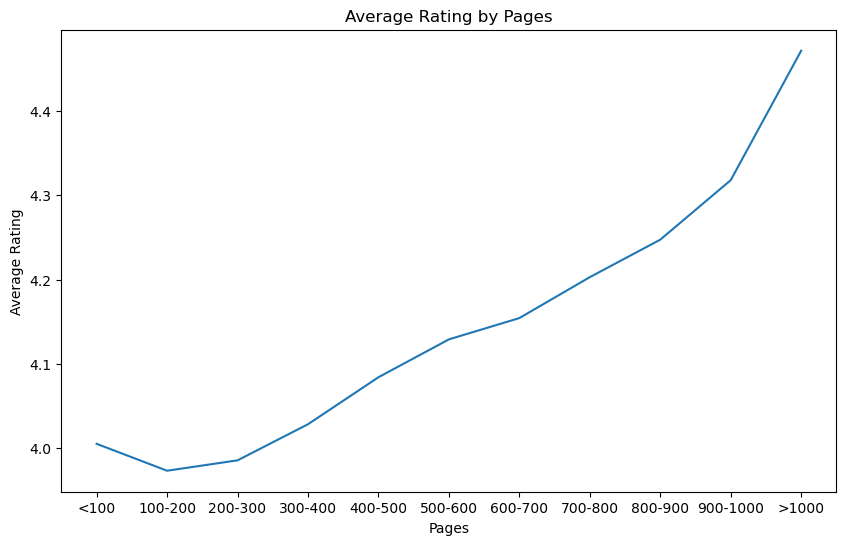

In [24]:
# Plot rating by number of pages (excluding 'unknown' category)

# Exclude 'unknown'
grouped_data = grouped_data[grouped_data.index != 'unknown']

# Order for the x-axis categories
category_order = ['<100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '>1000']

# Figure
fig, ax = plt.subplots(figsize=(10, 6))

# Continuous line for the average rating
ax.plot(category_order, grouped_data.loc[category_order, 'avg_rating'])

# Axis labels and title
ax.set_xlabel('Pages')
ax.set_ylabel('Average Rating')
ax.set_title('Average Rating by Pages')

plt.show()

There appears to be a clear correlation between book length and rating, with longer books tending to receive higher ratings.

## Publish year

In [26]:
grouped_data = gr_data.groupby('publish_year').agg({'title': 'count', 'rating': 'mean'})
grouped_data = grouped_data.rename(columns={'title': 'count', 'rating': 'avg_rating'})
grouped_data = grouped_data.sort_values(by='publish_year', ascending=False)
grouped_data

,count,avg_rating
publish_year,,
2068,5,4.176000
2067,8,3.982500
2066,3,3.973333
2065,4,3.975000
2064,3,3.920000
2063,6,3.985000
2062,6,4.086667
2061,6,4.045000
2060,5,3.828000


In [27]:
gr_data['publish_year'].describe()

count    52478.000000
mean      1947.029136
std        338.840933
min          0.000000
25%       2001.000000
50%       2008.000000
75%       2013.000000
max       2068.000000
Name: publish_year, dtype: float64

# Check years > 2022

In [28]:
count= (gr_data['publish_year'] > 2022).sum()
count

206

In [33]:
mask = (gr_data['publish_year'] > 2022)
filtered_data = gr_data[mask]
filtered_data
row_indexes = list(filtered_data.index)
row_indexes[:10] #206

[115, 218, 231, 354, 535, 1101, 1188, 1219, 1256, 1276]

In [25]:
gr_data.columns[:21]

Index(['title', 'series', 'author', 'description', 'language', 'pages', 'isbn',
       'book_format', 'publish_year', 'first_publish_year', 'publisher',
       'liked_perc', 'bbe_score', 'bbe_votes', 'log_num_ratings',
       '5_stars_num_ratings', '4_stars_num_ratings', '3_stars_num_ratings',
       '2_stars_num_ratings', '1_star_num_ratings', 'rating'],
      dtype='object')

### Stars rating

In [55]:
# Rating according to the number of counts for each star rating

stars = gr_data[['5_stars_num_ratings', '4_stars_num_ratings', '3_stars_num_ratings',
                 '2_stars_num_ratings', '1_star_num_ratings', 'rating']]

stars = stars.sort_values('rating', ascending=False)

stars.head(10)

,5_stars_num_ratings,4_stars_num_ratings,3_stars_num_ratings,2_stars_num_ratings,1_star_num_ratings,rating
20316,0,0,0,0,0,5.0
23563,0,0,0,0,0,5.0
32299,7,0,0,0,0,5.0
37250,0,0,0,0,0,5.0
23539,8,0,0,0,0,5.0
20959,14,0,0,0,0,5.0
23548,6,0,0,0,0,5.0
23549,0,0,0,0,0,5.0
20953,0,0,0,0,0,5.0
21000,0,0,0,0,0,5.0


In [70]:
votes = gr_data['5_stars_num_ratings'] + gr_data['4_stars_num_ratings'] + gr_data['3_stars_num_ratings'] + gr_data['2_stars_num_ratings'] + gr_data['1_star_num_ratings']
filtered = gr_data[votes == 0]
result = filtered[filtered['rating'] == 5]
print(f"There are {len(result)} books with a rating of 5 and no count ratings in any of the star categories.")

There are 708 books with a rating of 5 and no count ratings in any of the star categories.


In [69]:
votes = gr_data['5_stars_num_ratings'] + gr_data['4_stars_num_ratings'] + gr_data['3_stars_num_ratings'] + gr_data['2_stars_num_ratings'] + gr_data['1_star_num_ratings']
filtered = gr_data[votes == 0]
print(f"There are {len(filtered)} books with no count star ratings.")

There are 1423 books with no count star ratings.


In [75]:
# Sum of all votes (5 to 1 stars) for each book
votes = gr_data['5_stars_num_ratings'] + gr_data['4_stars_num_ratings'] + gr_data['3_stars_num_ratings'] + gr_data['2_stars_num_ratings'] + gr_data['1_star_num_ratings']

# Filter the DataFrame based on sum of votes > 100
filtered_data = gr_data[votes > 500]

# Count the number of books in the filtered DataFrame
num_books = len(filtered_data)

# Print the result
print(f"There are {num_books} books with a sum of votes greater than 100.")


There are 37354 books with a sum of votes greater than 100.


In [72]:
# Sum of all votes (5 to 1 stars) for each book
total_votes = gr_data['5_stars_num_ratings'] + gr_data['4_stars_num_ratings'] + gr_data['3_stars_num_ratings'] + gr_data['2_stars_num_ratings'] + gr_data['1_star_num_ratings']
total_votes_sorted = votes.sort_values()
total_votes_sorted

32510          0
50721          0
25762          0
17907          0
21770          0
          ...   
27       3775504
2        4501075
4        4964519
0        6376780
32       7048471
Length: 52478, dtype: int64

In [84]:
# Data from books with > 500 counts in star ratings

# Sum of all votes (5 to 1 stars) for each book
votes = gr_data['5_stars_num_ratings'] + gr_data['4_stars_num_ratings'] + gr_data['3_stars_num_ratings'] + gr_data['2_stars_num_ratings'] + gr_data['1_star_num_ratings']

# Filter the dataframe based on sum of votes > 500
filtered_data = gr_data[votes > 500]

# Count the number of books in the filtered dataframe
num_books = len(filtered_data)

# Extract the ratings for the filtered books
filtered_ratings = filtered_data[['5_stars_num_ratings', '4_stars_num_ratings', '3_stars_num_ratings',                                  '2_stars_num_ratings', '1_star_num_ratings', 'rating']]

filtered_ratings = filtered_ratings.sort_values('rating', ascending=False)

print(f"There are {num_books} books with a sum of votes greater than 500.")
filtered_ratings.head(10)


There are 37354 books with a sum of votes greater than 500.


,5_stars_num_ratings,4_stars_num_ratings,3_stars_num_ratings,2_stars_num_ratings,1_star_num_ratings,rating
2488,497,2,2,0,3,4.96
43462,624,60,7,2,1,4.88
7737,777,60,15,3,6,4.86
256,30247,3561,782,167,136,4.82
32605,527,50,11,6,6,4.81
35525,503,65,14,1,5,4.80
26500,10828,2020,293,38,15,4.79
9529,3176,300,107,42,33,4.79
7008,44933,5566,1417,333,500,4.78
2756,10945,1293,408,114,108,4.78


In [91]:
# Filter data based on sum of star votes > 500
filtered_data = gr_data[votes > 500].copy()

# Count the number of books in the filtered data
num_books = len(filtered_data)

# Extract the ratings for the filtered books
filtered_ratings = filtered_data[['5_stars_num_ratings', '4_stars_num_ratings', '3_stars_num_ratings', '2_stars_num_ratings', '1_star_num_ratings', 'rating']]

# New column with the total votes for each book
filtered_ratings['total_votes'] = filtered_ratings.sum(axis=1)

# Sort by rating in descending order
filtered_ratings = filtered_ratings.sort_values('rating', ascending=False)

filtered_ratings = filtered_ratings[['total_votes','rating']]

print(f"There are {num_books} books with a sum of votes greater than 500.")
filtered_ratings.head(10)

There are 37354 books with a sum of votes greater than 500.


/var/folders/w7/7cfd14hn02g0d126w5q47rqw0000gn/T/ipykernel_2129/3048025528.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ratings['total_votes'] = filtered_ratings.sum(axis=1)


,total_votes,rating
2488,508.96,4.96
43462,698.88,4.88
7737,865.86,4.86
256,34897.82,4.82
32605,604.81,4.81
35525,592.80,4.80
26500,13198.79,4.79
9529,3662.79,4.79
7008,52753.78,4.78
2756,12872.78,4.78


In [98]:
# Filter books with a rating of 3 or higher
high_rated_books = filtered_ratings[filtered_ratings['rating'] >= 3]

# Count the number of high-rated books
num_high_rated_books = len(high_rated_books)

print(f"There are {num_high_rated_books} books with a rating of 3 or higher.")

There are 37301 books with a rating of 3 or higher.


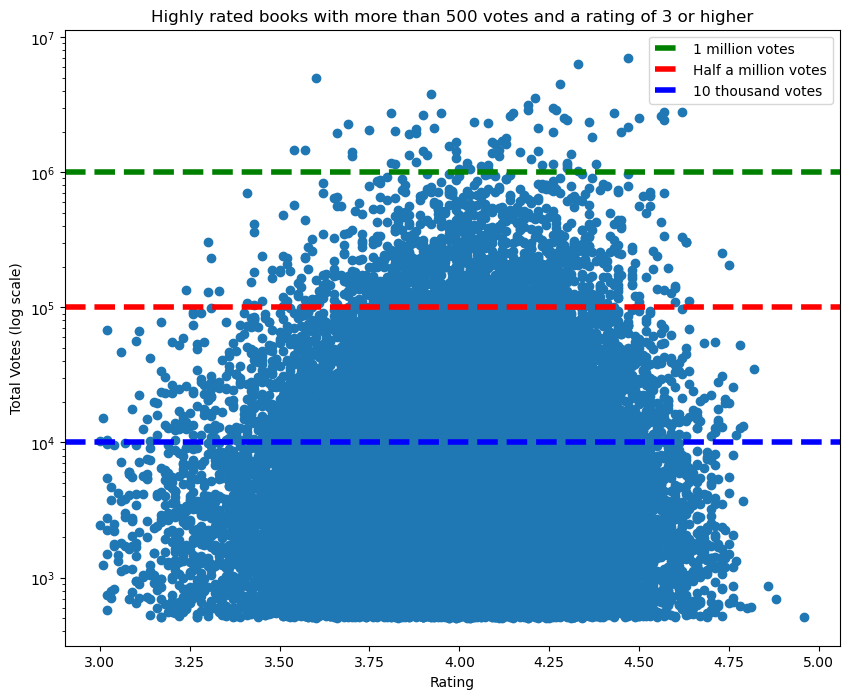

In [112]:
from sklearn.linear_model import LinearRegression

# Filter books with a total of more than 500 votes and a rating of 3 or higher
highly_voted_books = filtered_ratings[(filtered_ratings['total_votes'] > 500) & (filtered_ratings['rating'] >= 3)]

# Sort by rating in descending order
highly_voted_books = highly_voted_books.sort_values('rating', ascending=False)

# Plot the chart
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(highly_voted_books['rating'], highly_voted_books['total_votes'])
ax.set_xlabel('Rating')
ax.set_ylabel('Total Votes (log scale)')
ax.set_title('Highly rated books with more than 500 votes and a rating of 3 or higher')

# Add trend line
#X = highly_voted_books['rating'].values.reshape(-1, 1)
#y = highly_voted_books['total_votes'].values.reshape(-1, 1)
#reg = LinearRegression().fit(X, y)
#ax.plot(X, reg.predict(X), color='red', linewidth=3, label='Trend line')

# Add lines for 1 million, half a million, and 10 thousand votes
ax.axhline(y=1e6, color='green', linestyle='--', linewidth=4, label='1 million votes')
ax.axhline(y=1e5, color='red', linestyle='--', linewidth=4, label='Half a million votes')
ax.axhline(y=1e4, color='blue', linestyle='--', linewidth=4, label='10 thousand votes')

ax.set_yscale('log')  # Set y-axis to log scale
ax.legend()  # Add legend
plt.show()


##### HEXBIN PLOT

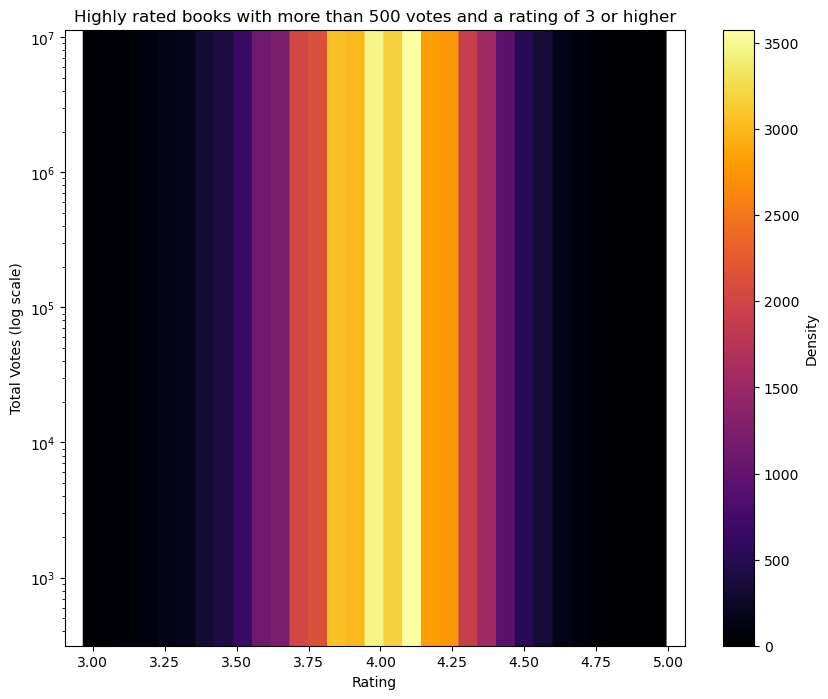

In [113]:

# Create hexbin plot
fig, ax = plt.subplots(figsize=(10, 8))
hb = ax.hexbin(highly_voted_books['rating'], highly_voted_books['total_votes'], gridsize=30, cmap='inferno')
ax.set_xlabel('Rating')
ax.set_ylabel('Total Votes (log scale)')
ax.set_title('Highly rated books with more than 500 votes and a rating of 3 or higher')

# Add colorbar
cb = fig.colorbar(hb)
cb.set_label('Density')

ax.set_yscale('log')  # Set y-axis to log scale
plt.show()


In [115]:
gr_data.columns[:21]

Index(['title', 'series', 'author', 'description', 'language', 'pages', 'isbn',
       'book_format', 'publish_year', 'first_publish_year', 'publisher',
       'liked_perc', 'bbe_score', 'bbe_votes', 'log_num_ratings',
       '5_stars_num_ratings', '4_stars_num_ratings', '3_stars_num_ratings',
       '2_stars_num_ratings', '1_star_num_ratings', 'rating'],
      dtype='object')

### BBE_score_BBE_votes, Num_ratings